## Lab 12 Part II: Plotting Vertical Equivalent Potential Temperature
<br /><br />
In this final exercise, we are going to create a vertical profile of equivalent potential temperature to find our most unstable parcel.
<br />

If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

<br />
1. As usual, we start by importing the modules we need for our Python code.

In [1]:
#from python's date and time module (from datetime) import the ability to work with date and times (import datetime)
from datetime import datetime

#using the module siphon and its ability to retrieve files from online (.simplewebservice) specifically for the University of Wyoming (.wyoming), 
#import the ability to download from the University of Wyoming's upper-air data archive
from siphon.simplewebservice.wyoming import WyomingUpperAir

#import the plotting abilities of the module matplotlib (import matplotlib.pyplot) and save it to plt
import matplotlib.pyplot as plt

#import the metpy calc module as calc
import metpy.calc as calc

#from metpy units module import the units function
from metpy.units import units

#from the metpy's units feature (metpy.units) import the ability to assign and convert units (units)
from metpy.units import units

#import the numpy module as np
import numpy as np

<br /><br />
2. In the code section below, I retrieve the sounding data for May 20th, 2013 at 1200 UTC and calculate equivalent potential temperature for you.  The resulting equivalent potential temperature is saved back to the pandas data frame as "theta-e".

In [2]:
site = "OUN"
time = datetime(2013,5,20,12)
data = WyomingUpperAir.request_data(time, site)
data["theta-e"] = calc.equivalent_potential_temperature(np.array(data["pressure"]) * units.hPa, np.array(data["temperature"]) * units.degC, np.array(data["dewpoint"]) * units.degC)
data

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw,theta-e
0,966.0,345,21.6,19.7,160.0,7.0,-2.394141,6.577848,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,341.703282
1,958.0,416,21.2,19.5,167.0,12.0,-2.699413,11.692441,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,341.878591
2,936.6,610,20.4,19.2,185.0,27.0,2.353205,26.897257,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,343.378183
3,925.0,717,20.0,19.0,195.0,34.0,8.799848,32.841478,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,344.159862
4,909.0,868,19.0,18.8,214.0,39.0,21.808523,32.332465,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,344.940485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,19.9,26613,-48.9,-71.9,50.0,7.0,-5.362311,-4.499513,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,687.832251
107,17.7,27377,-51.7,-73.7,59.0,14.0,-12.000342,-7.210533,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,702.215710
108,17.6,27432,-51.4,-73.8,60.0,15.0,-12.990381,-7.500000,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,704.297812
109,15.3,28346,-45.6,-74.8,230.0,6.0,4.596267,3.856726,OUN,72357,2013-05-20 12:00:00,35.18,-97.44,345.0,26.02,752.223718


<br /><br />
3.  Now that you have the data to work with, we are ready to create an equivalent potential temperature plot.  An example of this kind of plot can be found in the link below.  Using the example plot as a guide create a plot in matplotlib to show theta-e with height.  Be sure to have an appropriate axis labels and a title.  I've given you reference guides to various functions that you may need below.  (hint: you need to start by setting up the figure like normal)

#### Example Plot:
https://panthers.sharepoint.com/:i:/s/InnovativeWeatherWebsite-Group/EflvdcvIegNNvoeF5dYDTx0BZk8E2dSTefTWxVT3tdZy9g


#### References
Plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html<br>
xlabel: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html<br>
ylabel: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html<br>
title: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html<br>


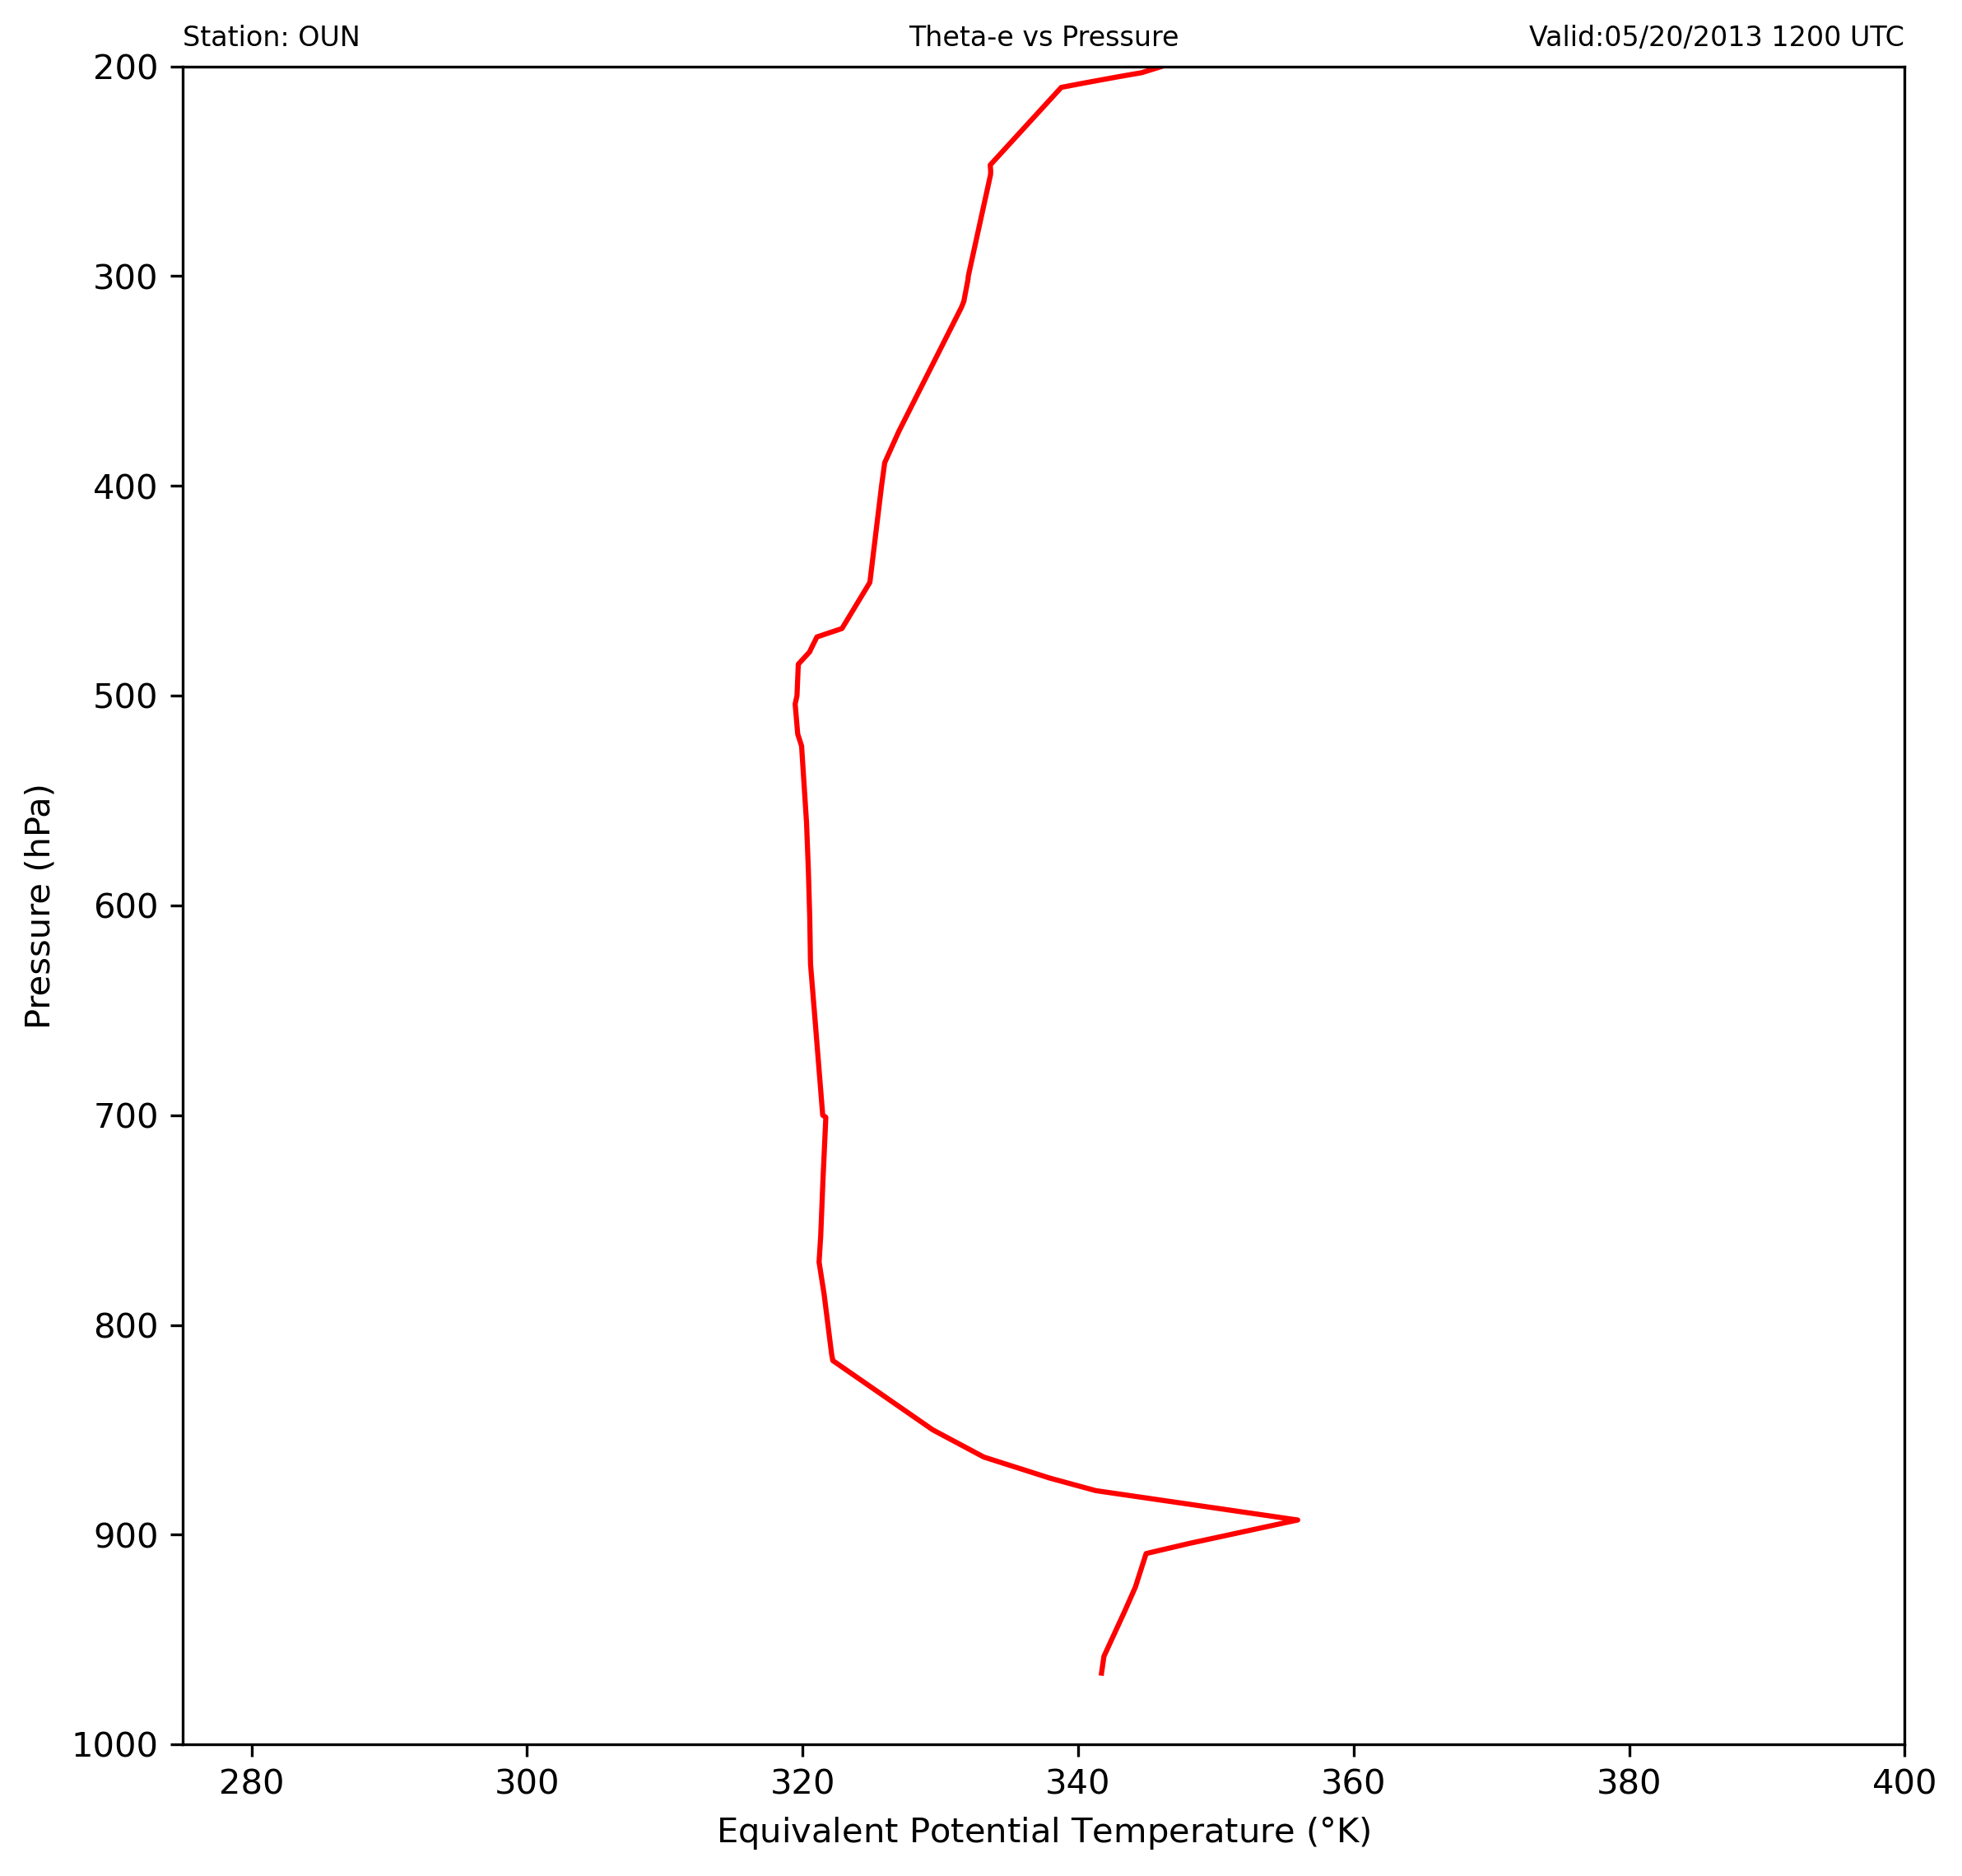

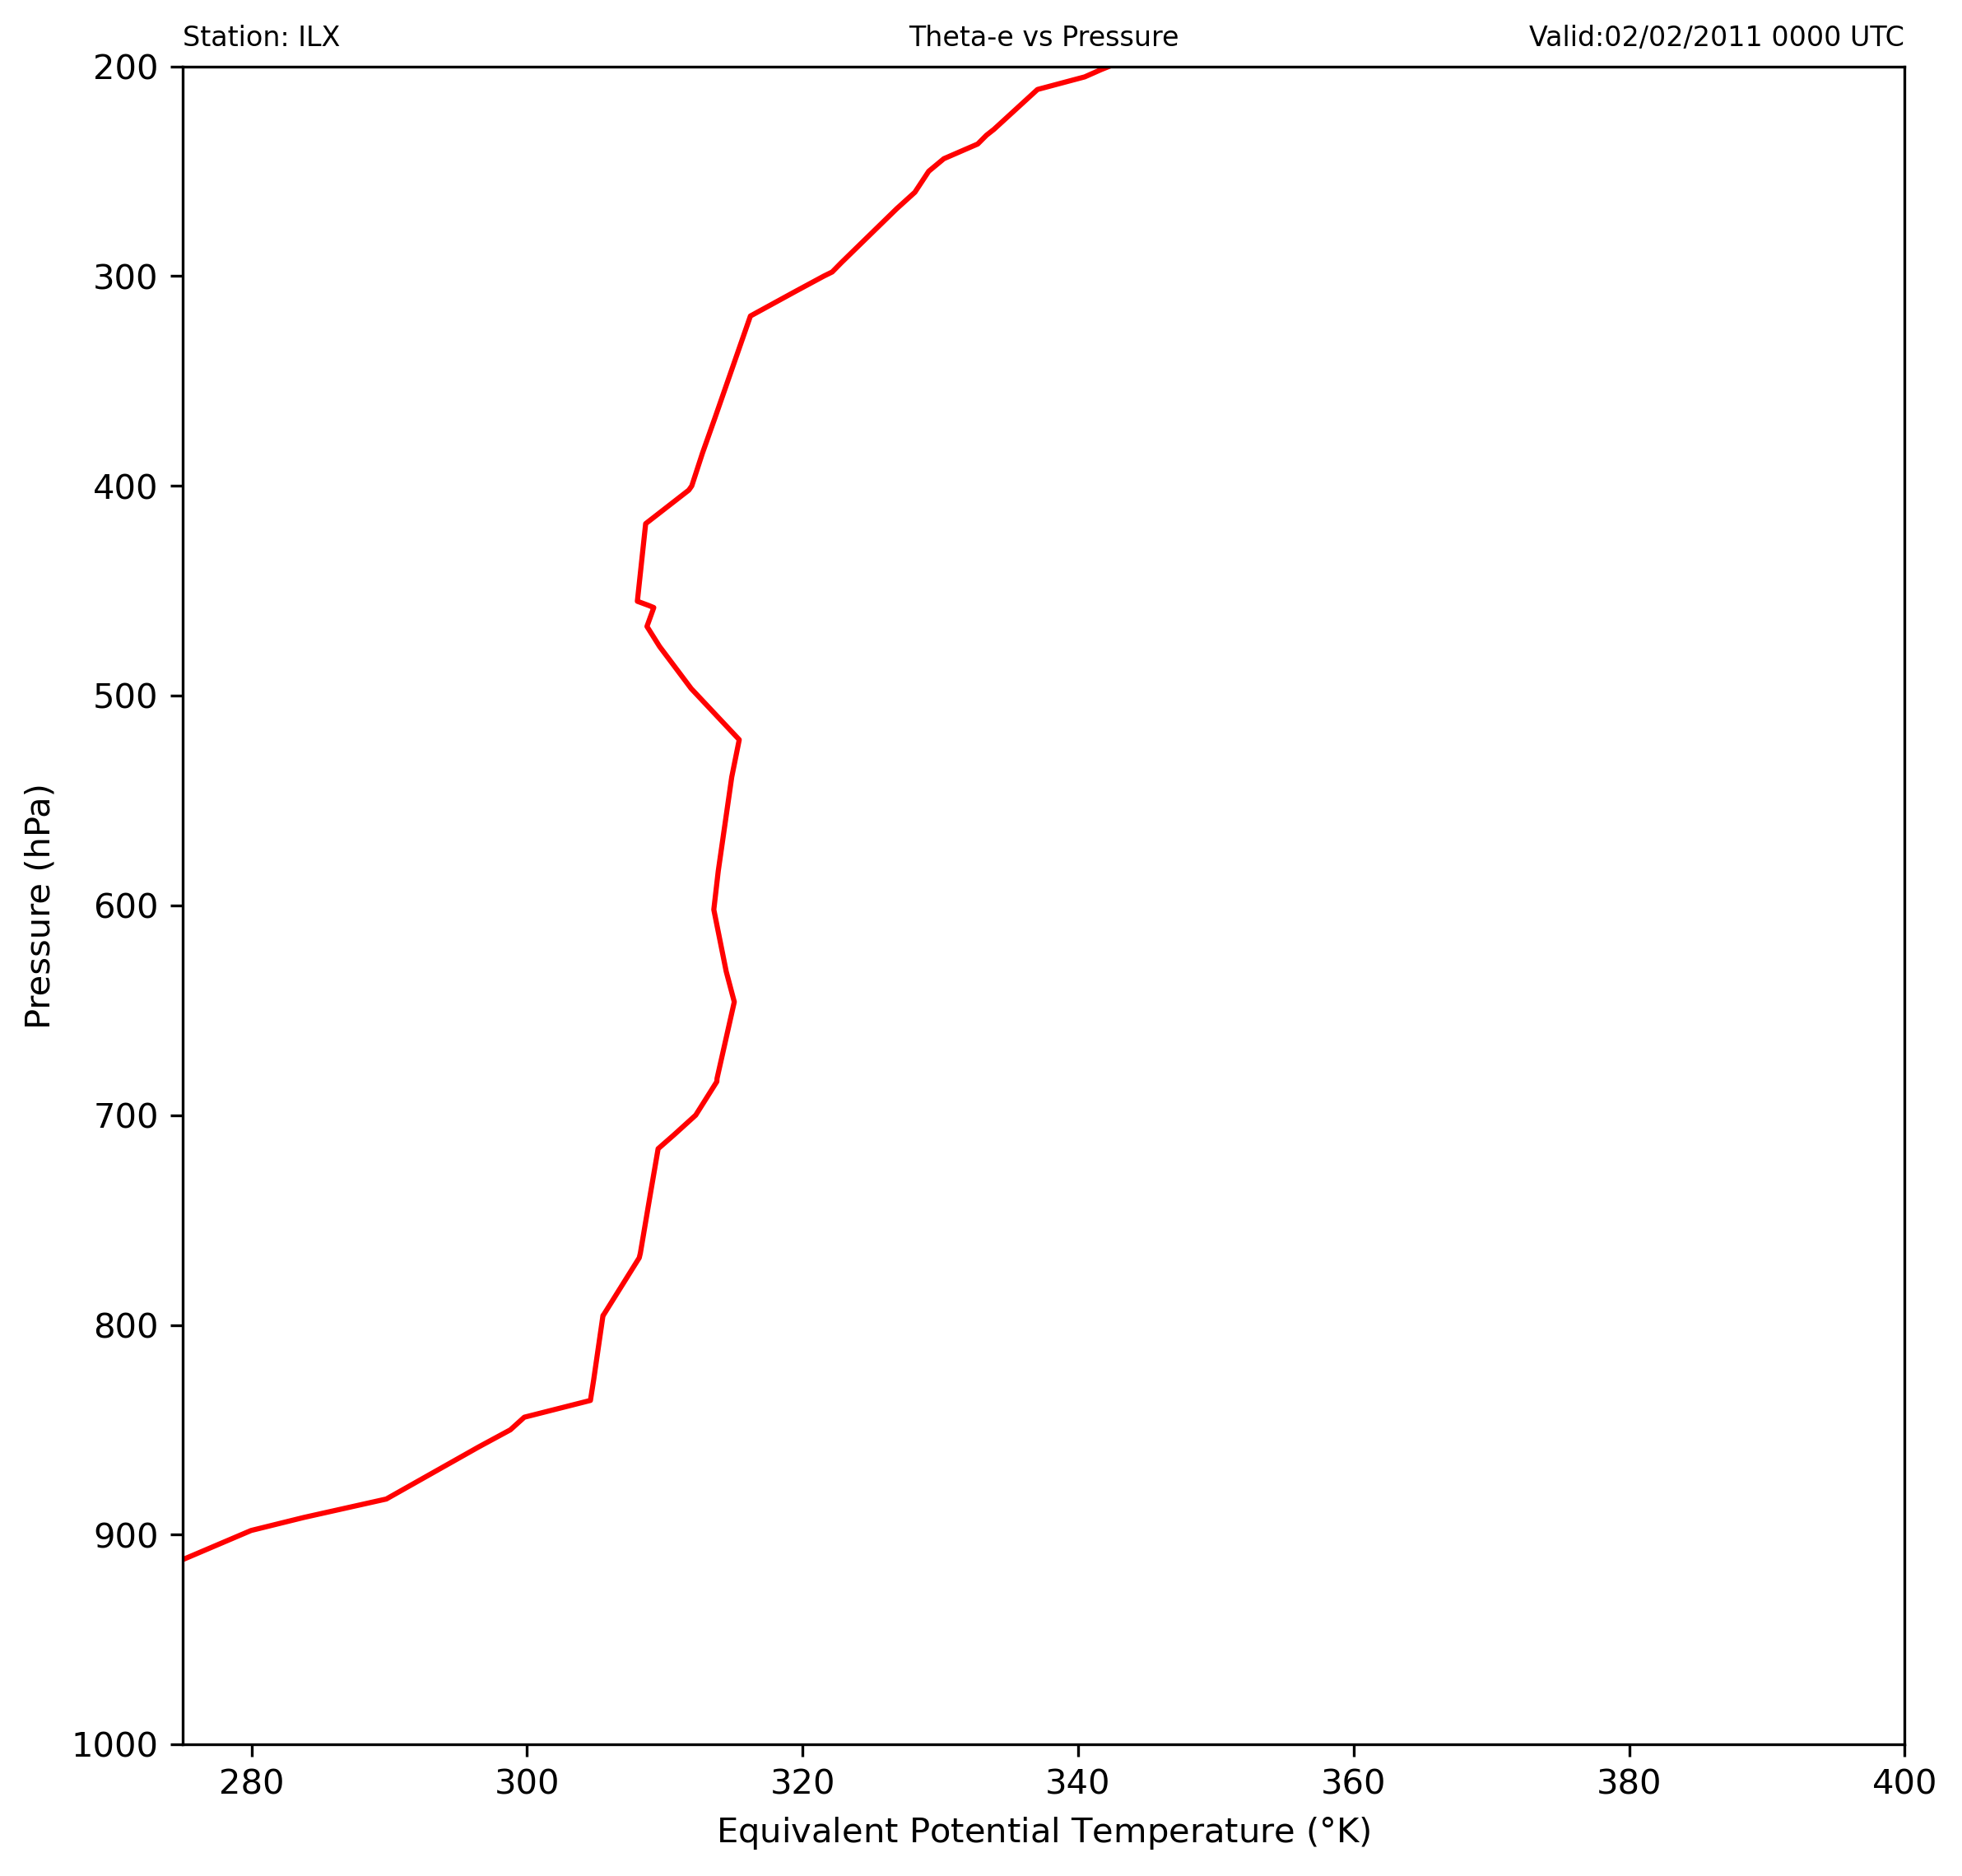

In [3]:
def plot_theta(data,site,time):
    fig = plt.figure(figsize=(9,9),dpi=300)
    plt.ylim(1000,200)
    plt.xlim(275,400)

    plt.plot(data["theta-e"],data["pressure"],color="r")


    plt.xlabel("Equivalent Potential Temperature ($\degree$K)")
    plt.ylabel("Pressure (hPa)")
    plt.title(f"Valid:{time:%m/%d/%Y %H%M} UTC",size=8,loc="right")
    plt.title(f"Station: {site}",size=8,loc="left")
    plt.title("Theta-e vs Pressure",size=8,loc="center")

plot_theta(data,site,time)

site = "ILX"
time = datetime(2011,2,2,0)
data = WyomingUpperAir.request_data(time, site)
data["theta-e"] = calc.equivalent_potential_temperature(np.array(data["pressure"]) * units.hPa, np.array(data["temperature"]) * units.degC, np.array(data["dewpoint"]) * units.degC)

plot_theta(data,site,time)



### You have now completed Python portion of the lab.  Be sure to submit the fully rendered Jupyter Notebook on GitHub when you are finished.